In [1]:
from matplotlib.pyplot import figure

figure(figsize=(18, 12), dpi=300)

<Figure size 5400x3600 with 0 Axes>

<Figure size 5400x3600 with 0 Axes>

In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

In [122]:
# Load the dataframe that was saved in read_files.py

default = False

if default:
    df = pd.read_csv("tmp/df.csv", index_col=0)
    labels = ['mean Cd 200', 'mean Cd 400', 'mean Cd 600']
    q = df["mean Cd 200"].quantile(0.999)

else:
    df = pd.read_csv("tmp/training_data.csv",  sep="\t")
    labels = ['cd', 'cl']
    q = df["cd"].quantile(0.99)
    df = df[(df["cd"] < q) & (df["cd"]>-0.5) ]



<AxesSubplot:xlabel='u', ylabel='cl'>

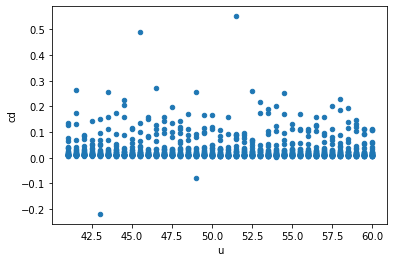

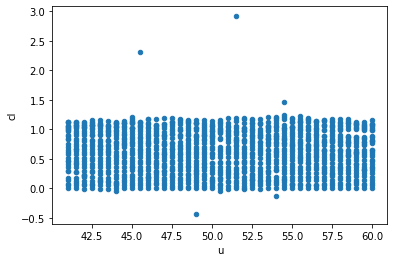

In [123]:
# Exploration for outliers
df.plot.scatter("u","cd")
df.plot.scatter("u","cl")


In [124]:
train, test = train_test_split(df, test_size=0.2)
train_features = train.copy()
test_features = test.copy()

In [125]:
# Remove the "mean Cd" column from the features and use it as label
train_labels = pd.concat([train_features.pop(x) for x in labels ], axis=1)
#train_labels = train_features.pop('mean Cd')
test_labels = pd.concat([test_features.pop(x) for x in labels], axis=1)
train.sha

In [126]:
n_layers = 8
n_nodes = 32

In [117]:
all_layers = [layers.Dense(n_nodes, activation="tanh", name="hidden_layer_"+str(i)) for i in np.arange(n_layers)]
all_layers.append(layers.Dense(2, name="output_layer"))
model = Sequential(all_layers)


In [118]:
model.compile(optimizer="Adam", loss='mean_squared_error')


In [119]:
history = model.fit(
    train_features, train_labels,
    epochs=4000,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/4000
1/1 [==============================] - 1s 540ms/step - loss: 0.7964 - val_loss: 0.2625
Epoch 2/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.4138 - val_loss: 0.1008
Epoch 3/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1758 - val_loss: 0.0615
Epoch 4/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0644 - val_loss: 0.1041
Epoch 5/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0439 - val_loss: 0.1797
Epoch 6/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0707 - val_loss: 0.2467
Epoch 7/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.1063 - val_loss: 0.2826
Epoch 8/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1278 - val_loss: 0.2846
Epoch 9/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.1291 - val_loss: 0.2604
Epoch 10/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1144 - val_loss: 0.2207
Epoch 11

1/1 [==============================] - 0s 19ms/step - loss: 0.0216 - val_loss: 0.0564
Epoch 84/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0215 - val_loss: 0.0563
Epoch 85/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0214 - val_loss: 0.0558
Epoch 86/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0213 - val_loss: 0.0550
Epoch 87/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0212 - val_loss: 0.0539
Epoch 88/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0210 - val_loss: 0.0525
Epoch 89/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0209 - val_loss: 0.0510
Epoch 90/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0207 - val_loss: 0.0496
Epoch 91/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0206 - val_loss: 0.0482
Epoch 92/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0205 - val_loss: 0.0470
Epoch 93/4000


1/1 [==============================] - 0s 20ms/step - loss: 0.0160 - val_loss: 0.0290
Epoch 165/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0160 - val_loss: 0.0289
Epoch 166/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0160 - val_loss: 0.0288
Epoch 167/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0160 - val_loss: 0.0288
Epoch 168/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0159 - val_loss: 0.0287
Epoch 169/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0159 - val_loss: 0.0286
Epoch 170/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0159 - val_loss: 0.0286
Epoch 171/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0159 - val_loss: 0.0285
Epoch 172/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0159 - val_loss: 0.0285
Epoch 173/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0159 - val_loss: 0.0284
Epoch

1/1 [==============================] - 0s 16ms/step - loss: 0.0154 - val_loss: 0.0296
Epoch 246/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0154 - val_loss: 0.0297
Epoch 247/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0154 - val_loss: 0.0297
Epoch 248/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0154 - val_loss: 0.0298
Epoch 249/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0154 - val_loss: 0.0298
Epoch 250/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0154 - val_loss: 0.0299
Epoch 251/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0154 - val_loss: 0.0300
Epoch 252/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0154 - val_loss: 0.0300
Epoch 253/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0154 - val_loss: 0.0301
Epoch 254/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0154 - val_loss: 0.0302
Epoch

1/1 [==============================] - 0s 15ms/step - loss: 0.0151 - val_loss: 0.0349
Epoch 327/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0151 - val_loss: 0.0350
Epoch 328/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0151 - val_loss: 0.0350
Epoch 329/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0151 - val_loss: 0.0351
Epoch 330/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0151 - val_loss: 0.0351
Epoch 331/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0151 - val_loss: 0.0352
Epoch 332/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0151 - val_loss: 0.0352
Epoch 333/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0151 - val_loss: 0.0353
Epoch 334/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0151 - val_loss: 0.0353
Epoch 335/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0151 - val_loss: 0.0354
Epoch

1/1 [==============================] - 0s 19ms/step - loss: 0.0149 - val_loss: 0.0353
Epoch 408/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0149 - val_loss: 0.0352
Epoch 409/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0149 - val_loss: 0.0351
Epoch 410/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0149 - val_loss: 0.0351
Epoch 411/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0149 - val_loss: 0.0350
Epoch 412/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0149 - val_loss: 0.0349
Epoch 413/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0149 - val_loss: 0.0348
Epoch 414/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0149 - val_loss: 0.0348
Epoch 415/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0149 - val_loss: 0.0347
Epoch 416/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0149 - val_loss: 0.0346
Epoch

1/1 [==============================] - 0s 17ms/step - loss: 0.0144 - val_loss: 0.0234
Epoch 489/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0144 - val_loss: 0.0232
Epoch 490/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0144 - val_loss: 0.0230
Epoch 491/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0144 - val_loss: 0.0229
Epoch 492/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0144 - val_loss: 0.0227
Epoch 493/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0143 - val_loss: 0.0225
Epoch 494/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0143 - val_loss: 0.0223
Epoch 495/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0143 - val_loss: 0.0221
Epoch 496/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0143 - val_loss: 0.0219
Epoch 497/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0143 - val_loss: 0.0217
Epoch

1/1 [==============================] - 0s 20ms/step - loss: 0.0097 - val_loss: 0.0166
Epoch 570/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0096 - val_loss: 0.0169
Epoch 571/4000
1/1 [==============================] - ETA: 0s - loss: 0.009 - 0s 18ms/step - loss: 0.0095 - val_loss: 0.0171
Epoch 572/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0094 - val_loss: 0.0173
Epoch 573/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0093 - val_loss: 0.0176
Epoch 574/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0092 - val_loss: 0.0178
Epoch 575/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0091 - val_loss: 0.0181
Epoch 576/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0090 - val_loss: 0.0184
Epoch 577/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0089 - val_loss: 0.0187
Epoch 578/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0088 

1/1 [==============================] - 0s 22ms/step - loss: 0.0088 - val_loss: 0.0532
Epoch 651/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - val_loss: 0.0840
Epoch 652/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0094 - val_loss: 0.0318
Epoch 653/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0157 - val_loss: 0.0315
Epoch 654/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0134 - val_loss: 0.0845
Epoch 655/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0093 - val_loss: 0.0608
Epoch 656/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0038 - val_loss: 0.0347
Epoch 657/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0083 - val_loss: 0.0469
Epoch 658/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0040 - val_loss: 0.0862
Epoch 659/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0101 - val_loss: 0.0366
Epoch

1/1 [==============================] - 0s 19ms/step - loss: 0.0012 - val_loss: 0.0891
Epoch 732/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 0.0949
Epoch 733/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - val_loss: 0.0908
Epoch 734/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0012 - val_loss: 0.0954
Epoch 735/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - val_loss: 0.0939
Epoch 736/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - val_loss: 0.0950
Epoch 737/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 0.0970
Epoch 738/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0011 - val_loss: 0.0950
Epoch 739/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0996
Epoch 740/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 0.0953
Epoch

Epoch 811/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.0890e-04 - val_loss: 0.1109
Epoch 812/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.4531e-04 - val_loss: 0.0971
Epoch 813/4000
1/1 [==============================] - 0s 17ms/step - loss: 5.4253e-04 - val_loss: 0.1180
Epoch 814/4000
1/1 [==============================] - 0s 20ms/step - loss: 6.7598e-04 - val_loss: 0.0934
Epoch 815/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.6111e-04 - val_loss: 0.1166
Epoch 816/4000
1/1 [==============================] - 0s 17ms/step - loss: 5.7560e-04 - val_loss: 0.0996
Epoch 817/4000
1/1 [==============================] - 0s 20ms/step - loss: 4.0591e-04 - val_loss: 0.1091
Epoch 818/4000
1/1 [==============================] - 0s 20ms/step - loss: 2.7694e-04 - val_loss: 0.1087
Epoch 819/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6673e-04 - val_loss: 0.1010
Epoch 820/4000
1/1 [==============================] - 0

1/1 [==============================] - 0s 20ms/step - loss: 1.0340e-04 - val_loss: 0.1103
Epoch 890/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.2239e-04 - val_loss: 0.1016
Epoch 891/4000
1/1 [==============================] - 0s 19ms/step - loss: 1.3401e-04 - val_loss: 0.1105
Epoch 892/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.2681e-04 - val_loss: 0.1023
Epoch 893/4000
1/1 [==============================] - 0s 21ms/step - loss: 1.1282e-04 - val_loss: 0.1091
Epoch 894/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.1603e-05 - val_loss: 0.1043
Epoch 895/4000
1/1 [==============================] - 0s 17ms/step - loss: 7.4463e-05 - val_loss: 0.1069
Epoch 896/4000
1/1 [==============================] - 0s 16ms/step - loss: 6.4097e-05 - val_loss: 0.1066
Epoch 897/4000
1/1 [==============================] - 0s 18ms/step - loss: 6.2062e-05 - val_loss: 0.1049
Epoch 898/4000
1/1 [==============================] - 0s 21ms/step - l

1/1 [==============================] - 0s 17ms/step - loss: 5.2017e-05 - val_loss: 0.1048
Epoch 968/4000
1/1 [==============================] - 0s 21ms/step - loss: 6.3476e-05 - val_loss: 0.0989
Epoch 969/4000
1/1 [==============================] - 0s 20ms/step - loss: 6.7986e-05 - val_loss: 0.1047
Epoch 970/4000
1/1 [==============================] - 0s 20ms/step - loss: 6.1302e-05 - val_loss: 0.0998
Epoch 971/4000
1/1 [==============================] - 0s 24ms/step - loss: 5.0330e-05 - val_loss: 0.1032
Epoch 972/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.9667e-05 - val_loss: 0.1018
Epoch 973/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.4655e-05 - val_loss: 0.1013
Epoch 974/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.5996e-05 - val_loss: 0.1035
Epoch 975/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.1175e-05 - val_loss: 0.1002
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - l

Epoch 1045/4000
1/1 [==============================] - 0s 21ms/step - loss: 1.2697e-04 - val_loss: 0.0850
Epoch 1046/4000
1/1 [==============================] - 0s 17ms/step - loss: 6.0776e-04 - val_loss: 0.1114
Epoch 1047/4000
1/1 [==============================] - 0s 16ms/step - loss: 8.3106e-04 - val_loss: 0.0823
Epoch 1048/4000
1/1 [==============================] - 0s 19ms/step - loss: 7.7410e-04 - val_loss: 0.1038
Epoch 1049/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.6078e-04 - val_loss: 0.0957
Epoch 1050/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.1925e-05 - val_loss: 0.0885
Epoch 1051/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0850e-04 - val_loss: 0.1051
Epoch 1052/4000
1/1 [==============================] - 0s 21ms/step - loss: 4.3754e-04 - val_loss: 0.0839
Epoch 1053/4000
1/1 [==============================] - 0s 17ms/step - loss: 4.7232e-04 - val_loss: 0.1007
Epoch 1054/4000
1/1 [=========================

1/1 [==============================] - 0s 17ms/step - loss: 2.4027e-05 - val_loss: 0.0957
Epoch 1123/4000
1/1 [==============================] - 0s 25ms/step - loss: 2.3764e-05 - val_loss: 0.0955
Epoch 1124/4000
1/1 [==============================] - 0s 20ms/step - loss: 2.3609e-05 - val_loss: 0.0955
Epoch 1125/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.3599e-05 - val_loss: 0.0958
Epoch 1126/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.3654e-05 - val_loss: 0.0954
Epoch 1127/4000
1/1 [==============================] - 0s 20ms/step - loss: 2.3659e-05 - val_loss: 0.0959
Epoch 1128/4000
1/1 [==============================] - 0s 21ms/step - loss: 2.3564e-05 - val_loss: 0.0956
Epoch 1129/4000
1/1 [==============================] - 0s 21ms/step - loss: 2.3405e-05 - val_loss: 0.0958
Epoch 1130/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.3259e-05 - val_loss: 0.0958
Epoch 1131/4000
1/1 [==============================] - 0s 22ms

1/1 [==============================] - 0s 25ms/step - loss: 1.9659e-05 - val_loss: 0.0967
Epoch 1200/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.9614e-05 - val_loss: 0.0968
Epoch 1201/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.9569e-05 - val_loss: 0.0967
Epoch 1202/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.9525e-05 - val_loss: 0.0968
Epoch 1203/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.9480e-05 - val_loss: 0.0967
Epoch 1204/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.9437e-05 - val_loss: 0.0968
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.9395e-05 - val_loss: 0.0967
Epoch 1206/4000
1/1 [==============================] - 0s 19ms/step - loss: 1.9353e-05 - val_loss: 0.0969
Epoch 1207/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.9313e-05 - val_loss: 0.0967
Epoch 1208/4000
1/1 [==============================] - 0s 17ms

Epoch 1277/4000
1/1 [==============================] - 0s 17ms/step - loss: 5.0160e-05 - val_loss: 0.0823
Epoch 1278/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.7331e-05 - val_loss: 0.0795
Epoch 1279/4000
1/1 [==============================] - 0s 24ms/step - loss: 2.5151e-05 - val_loss: 0.0795
Epoch 1280/4000
1/1 [==============================] - 0s 24ms/step - loss: 2.6789e-05 - val_loss: 0.0826
Epoch 1281/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.1148e-05 - val_loss: 0.0792
Epoch 1282/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.5212e-05 - val_loss: 0.0814
Epoch 1283/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.1328e-05 - val_loss: 0.0823
Epoch 1284/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6293e-05 - val_loss: 0.0797
Epoch 1285/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.4958e-05 - val_loss: 0.0828
Epoch 1286/4000
1/1 [=========================

1/1 [==============================] - 0s 18ms/step - loss: 1.5267e-05 - val_loss: 0.0854
Epoch 1355/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.5223e-05 - val_loss: 0.0854
Epoch 1356/4000
1/1 [==============================] - 0s 21ms/step - loss: 1.5188e-05 - val_loss: 0.0854
Epoch 1357/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.5157e-05 - val_loss: 0.0854
Epoch 1358/4000
1/1 [==============================] - 0s 18ms/step - loss: 1.5121e-05 - val_loss: 0.0855
Epoch 1359/4000
1/1 [==============================] - 0s 25ms/step - loss: 1.5080e-05 - val_loss: 0.0854
Epoch 1360/4000
1/1 [==============================] - 0s 24ms/step - loss: 1.5042e-05 - val_loss: 0.0854
Epoch 1361/4000
1/1 [==============================] - 0s 26ms/step - loss: 1.5008e-05 - val_loss: 0.0855
Epoch 1362/4000
1/1 [==============================] - 0s 21ms/step - loss: 1.4975e-05 - val_loss: 0.0854
Epoch 1363/4000
1/1 [==============================] - 0s 18ms

1/1 [==============================] - 0s 21ms/step - loss: 1.2761e-05 - val_loss: 0.0860
Epoch 1432/4000
1/1 [==============================] - 0s 24ms/step - loss: 1.2732e-05 - val_loss: 0.0860
Epoch 1433/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.2703e-05 - val_loss: 0.0860
Epoch 1434/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.2674e-05 - val_loss: 0.0861
Epoch 1435/4000
1/1 [==============================] - 0s 21ms/step - loss: 1.2645e-05 - val_loss: 0.0861
Epoch 1436/4000
1/1 [==============================] - 0s 19ms/step - loss: 1.2617e-05 - val_loss: 0.0861
Epoch 1437/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.2589e-05 - val_loss: 0.0861
Epoch 1438/4000
1/1 [==============================] - 0s 18ms/step - loss: 1.2560e-05 - val_loss: 0.0861
Epoch 1439/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.2532e-05 - val_loss: 0.0861
Epoch 1440/4000
1/1 [==============================] - 0s 18ms

1/1 [==============================] - 0s 21ms/step - loss: 1.0754e-05 - val_loss: 0.0866
Epoch 1509/4000
1/1 [==============================] - 0s 25ms/step - loss: 1.0731e-05 - val_loss: 0.0866
Epoch 1510/4000
1/1 [==============================] - 0s 23ms/step - loss: 1.0708e-05 - val_loss: 0.0866
Epoch 1511/4000
1/1 [==============================] - 0s 18ms/step - loss: 1.0685e-05 - val_loss: 0.0866
Epoch 1512/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.0661e-05 - val_loss: 0.0866
Epoch 1513/4000
1/1 [==============================] - 0s 18ms/step - loss: 1.0638e-05 - val_loss: 0.0866
Epoch 1514/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.0615e-05 - val_loss: 0.0866
Epoch 1515/4000
1/1 [==============================] - 0s 29ms/step - loss: 1.0592e-05 - val_loss: 0.0866
Epoch 1516/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.0570e-05 - val_loss: 0.0866
Epoch 1517/4000
1/1 [==============================] - 0s 21ms

1/1 [==============================] - 0s 16ms/step - loss: 0.0027 - val_loss: 0.0565
Epoch 1587/4000
1/1 [==============================] - 0s 18ms/step - loss: 1.4159e-04 - val_loss: 0.0788
Epoch 1588/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0035 - val_loss: 0.0390
Epoch 1589/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.0530
Epoch 1590/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.9269e-04 - val_loss: 0.0812
Epoch 1591/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0049 - val_loss: 0.0380
Epoch 1592/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0035 - val_loss: 0.0475
Epoch 1593/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - val_loss: 0.0808
Epoch 1594/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0055 - val_loss: 0.0415
Epoch 1595/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0021 - val_l

Epoch 1664/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.0263e-05 - val_loss: 0.0636
Epoch 1665/4000
1/1 [==============================] - 0s 21ms/step - loss: 1.0336e-05 - val_loss: 0.0632
Epoch 1666/4000
1/1 [==============================] - 0s 20ms/step - loss: 8.7663e-06 - val_loss: 0.0626
Epoch 1667/4000
1/1 [==============================] - 0s 18ms/step - loss: 1.0533e-05 - val_loss: 0.0632
Epoch 1668/4000
1/1 [==============================] - 0s 16ms/step - loss: 8.6276e-06 - val_loss: 0.0634
Epoch 1669/4000
1/1 [==============================] - 0s 19ms/step - loss: 9.6355e-06 - val_loss: 0.0627
Epoch 1670/4000
1/1 [==============================] - 0s 20ms/step - loss: 9.2549e-06 - val_loss: 0.0628
Epoch 1671/4000
1/1 [==============================] - 0s 17ms/step - loss: 8.6272e-06 - val_loss: 0.0634
Epoch 1672/4000
1/1 [==============================] - 0s 26ms/step - loss: 9.5318e-06 - val_loss: 0.0629
Epoch 1673/4000
1/1 [=========================

1/1 [==============================] - 0s 24ms/step - loss: 6.8988e-06 - val_loss: 0.0626
Epoch 1742/4000
1/1 [==============================] - 0s 25ms/step - loss: 6.8833e-06 - val_loss: 0.0626
Epoch 1743/4000
1/1 [==============================] - 0s 17ms/step - loss: 6.8662e-06 - val_loss: 0.0626
Epoch 1744/4000
1/1 [==============================] - 0s 17ms/step - loss: 6.8498e-06 - val_loss: 0.0626
Epoch 1745/4000
1/1 [==============================] - 0s 16ms/step - loss: 6.8342e-06 - val_loss: 0.0626
Epoch 1746/4000
1/1 [==============================] - 0s 17ms/step - loss: 6.8174e-06 - val_loss: 0.0626
Epoch 1747/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.8018e-06 - val_loss: 0.0627
Epoch 1748/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.7857e-06 - val_loss: 0.0627
Epoch 1749/4000
1/1 [==============================] - 0s 19ms/step - loss: 6.7694e-06 - val_loss: 0.0627
Epoch 1750/4000
1/1 [==============================] - 0s 20ms

1/1 [==============================] - 0s 20ms/step - loss: 5.7708e-06 - val_loss: 0.0630
Epoch 1819/4000
1/1 [==============================] - 0s 19ms/step - loss: 5.7577e-06 - val_loss: 0.0630
Epoch 1820/4000
1/1 [==============================] - 0s 20ms/step - loss: 5.7446e-06 - val_loss: 0.0630
Epoch 1821/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.7313e-06 - val_loss: 0.0630
Epoch 1822/4000
1/1 [==============================] - 0s 18ms/step - loss: 5.7185e-06 - val_loss: 0.0630
Epoch 1823/4000
1/1 [==============================] - 0s 19ms/step - loss: 5.7054e-06 - val_loss: 0.0630
Epoch 1824/4000
1/1 [==============================] - 0s 19ms/step - loss: 5.6924e-06 - val_loss: 0.0630
Epoch 1825/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.6791e-06 - val_loss: 0.0630
Epoch 1826/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.6662e-06 - val_loss: 0.0630
Epoch 1827/4000
1/1 [==============================] - 0s 19ms

1/1 [==============================] - 0s 19ms/step - loss: 4.8452e-06 - val_loss: 0.0633
Epoch 1896/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.8345e-06 - val_loss: 0.0633
Epoch 1897/4000
1/1 [==============================] - 0s 19ms/step - loss: 4.8233e-06 - val_loss: 0.0634
Epoch 1898/4000
1/1 [==============================] - 0s 17ms/step - loss: 4.8122e-06 - val_loss: 0.0634
Epoch 1899/4000
1/1 [==============================] - 0s 24ms/step - loss: 4.8016e-06 - val_loss: 0.0634
Epoch 1900/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.7908e-06 - val_loss: 0.0634
Epoch 1901/4000
1/1 [==============================] - 0s 21ms/step - loss: 4.7802e-06 - val_loss: 0.0634
Epoch 1902/4000
1/1 [==============================] - 0s 20ms/step - loss: 4.7692e-06 - val_loss: 0.0634
Epoch 1903/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.7585e-06 - val_loss: 0.0634
Epoch 1904/4000
1/1 [==============================] - 0s 20ms

1/1 [==============================] - 0s 19ms/step - loss: 4.0743e-06 - val_loss: 0.0637
Epoch 1973/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.0652e-06 - val_loss: 0.0637
Epoch 1974/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.0564e-06 - val_loss: 0.0637
Epoch 1975/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.0469e-06 - val_loss: 0.0637
Epoch 1976/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.0381e-06 - val_loss: 0.0637
Epoch 1977/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.0289e-06 - val_loss: 0.0638
Epoch 1978/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.0199e-06 - val_loss: 0.0638
Epoch 1979/4000
1/1 [==============================] - 0s 17ms/step - loss: 4.0110e-06 - val_loss: 0.0638
Epoch 1980/4000
1/1 [==============================] - 0s 21ms/step - loss: 4.0018e-06 - val_loss: 0.0638
Epoch 1981/4000
1/1 [==============================] - 0s 22ms

1/1 [==============================] - 0s 18ms/step - loss: 3.4286e-06 - val_loss: 0.0641
Epoch 2050/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.4210e-06 - val_loss: 0.0641
Epoch 2051/4000
1/1 [==============================] - 0s 33ms/step - loss: 3.4135e-06 - val_loss: 0.0641
Epoch 2052/4000
1/1 [==============================] - 0s 25ms/step - loss: 3.4057e-06 - val_loss: 0.0641
Epoch 2053/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.3979e-06 - val_loss: 0.0641
Epoch 2054/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.3907e-06 - val_loss: 0.0641
Epoch 2055/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.3829e-06 - val_loss: 0.0641
Epoch 2056/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.3752e-06 - val_loss: 0.0642
Epoch 2057/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.3679e-06 - val_loss: 0.0642
Epoch 2058/4000
1/1 [==============================] - 0s 23ms

1/1 [==============================] - 0s 15ms/step - loss: 2.8862e-06 - val_loss: 0.0645
Epoch 2127/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.8797e-06 - val_loss: 0.0645
Epoch 2128/4000
1/1 [==============================] - 0s 20ms/step - loss: 2.8735e-06 - val_loss: 0.0645
Epoch 2129/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.8670e-06 - val_loss: 0.0645
Epoch 2130/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.8607e-06 - val_loss: 0.0645
Epoch 2131/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.8543e-06 - val_loss: 0.0645
Epoch 2132/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.8480e-06 - val_loss: 0.0645
Epoch 2133/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.8415e-06 - val_loss: 0.0646
Epoch 2134/4000
1/1 [==============================] - 0s 21ms/step - loss: 2.8351e-06 - val_loss: 0.0646
Epoch 2135/4000
1/1 [==============================] - 0s 18ms

1/1 [==============================] - 0s 15ms/step - loss: 2.4306e-06 - val_loss: 0.0649
Epoch 2204/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.4251e-06 - val_loss: 0.0649
Epoch 2205/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.4200e-06 - val_loss: 0.0649
Epoch 2206/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.4145e-06 - val_loss: 0.0649
Epoch 2207/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.4091e-06 - val_loss: 0.0649
Epoch 2208/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.4037e-06 - val_loss: 0.0649
Epoch 2209/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.3983e-06 - val_loss: 0.0649
Epoch 2210/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.3930e-06 - val_loss: 0.0649
Epoch 2211/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.3878e-06 - val_loss: 0.0650
Epoch 2212/4000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 21ms/step - loss: 2.0480e-06 - val_loss: 0.0653
Epoch 2281/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.0436e-06 - val_loss: 0.0653
Epoch 2282/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.0389e-06 - val_loss: 0.0653
Epoch 2283/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.0344e-06 - val_loss: 0.0653
Epoch 2284/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.0301e-06 - val_loss: 0.0653
Epoch 2285/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.0254e-06 - val_loss: 0.0653
Epoch 2286/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.0210e-06 - val_loss: 0.0653
Epoch 2287/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.0166e-06 - val_loss: 0.0654
Epoch 2288/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.0120e-06 - val_loss: 0.0654
Epoch 2289/4000
1/1 [==============================] - 0s 15ms

1/1 [==============================] - 0s 15ms/step - loss: 1.7272e-06 - val_loss: 0.0657
Epoch 2358/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.7236e-06 - val_loss: 0.0657
Epoch 2359/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.7197e-06 - val_loss: 0.0657
Epoch 2360/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.7159e-06 - val_loss: 0.0657
Epoch 2361/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.7119e-06 - val_loss: 0.0657
Epoch 2362/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.7083e-06 - val_loss: 0.0657
Epoch 2363/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.7046e-06 - val_loss: 0.0657
Epoch 2364/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.7009e-06 - val_loss: 0.0658
Epoch 2365/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.6972e-06 - val_loss: 0.0658
Epoch 2366/4000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 16ms/step - loss: 1.4589e-06 - val_loss: 0.0661
Epoch 2435/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.4558e-06 - val_loss: 0.0661
Epoch 2436/4000
1/1 [==============================] - 0s 23ms/step - loss: 1.4528e-06 - val_loss: 0.0661
Epoch 2437/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.4497e-06 - val_loss: 0.0661
Epoch 2438/4000
1/1 [==============================] - 0s 23ms/step - loss: 1.4466e-06 - val_loss: 0.0661
Epoch 2439/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.4437e-06 - val_loss: 0.0661
Epoch 2440/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.4407e-06 - val_loss: 0.0662
Epoch 2441/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.4381e-06 - val_loss: 0.0661
Epoch 2442/4000
1/1 [==============================] - 0s 23ms/step - loss: 1.4356e-06 - val_loss: 0.0662
Epoch 2443/4000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 16ms/step - loss: 0.0061 - val_loss: 0.0984
Epoch 2514/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0114 - val_loss: 0.0959
Epoch 2515/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0057 - val_loss: 0.1279
Epoch 2516/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0069 - val_loss: 0.0850
Epoch 2517/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0073 - val_loss: 0.0674
Epoch 2518/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0040 - val_loss: 0.1088
Epoch 2519/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0044 - val_loss: 0.1300
Epoch 2520/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0066 - val_loss: 0.0591
Epoch 2521/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0050 - val_loss: 0.0594
Epoch 2522/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0070 - val_loss: 0.1

1/1 [==============================] - 0s 16ms/step - loss: 8.5932e-04 - val_loss: 0.1465
Epoch 2593/4000
1/1 [==============================] - 0s 15ms/step - loss: 9.4836e-04 - val_loss: 0.1231
Epoch 2594/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 0.1537
Epoch 2595/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0014 - val_loss: 0.1142
Epoch 2596/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0022 - val_loss: 0.1555
Epoch 2597/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0016 - val_loss: 0.1180
Epoch 2598/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 0.1494
Epoch 2599/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 0.1244
Epoch 2600/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 0.1432
Epoch 2601/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.4483e-04 - v

1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - val_loss: 0.1313
Epoch 2671/4000
1/1 [==============================] - 0s 20ms/step - loss: 9.8913e-04 - val_loss: 0.1056
Epoch 2672/4000
1/1 [==============================] - 0s 16ms/step - loss: 6.1621e-04 - val_loss: 0.1186
Epoch 2673/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.8932e-04 - val_loss: 0.1132
Epoch 2674/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2499e-04 - val_loss: 0.1085
Epoch 2675/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.7281e-04 - val_loss: 0.1195
Epoch 2676/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.9081e-04 - val_loss: 0.1013
Epoch 2677/4000
1/1 [==============================] - 0s 21ms/step - loss: 6.3753e-04 - val_loss: 0.1221
Epoch 2678/4000
1/1 [==============================] - 0s 25ms/step - loss: 6.8248e-04 - val_loss: 0.0998
Epoch 2679/4000
1/1 [==============================] - 0s 17ms/ste

1/1 [==============================] - 0s 17ms/step - loss: 1.7344e-04 - val_loss: 0.1076
Epoch 2748/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.6314e-04 - val_loss: 0.1043
Epoch 2749/4000
1/1 [==============================] - 0s 21ms/step - loss: 1.5243e-04 - val_loss: 0.1062
Epoch 2750/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.4609e-04 - val_loss: 0.1067
Epoch 2751/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.4467e-04 - val_loss: 0.1051
Epoch 2752/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.4675e-04 - val_loss: 0.1087
Epoch 2753/4000
1/1 [==============================] - ETA: 0s - loss: 1.5049e-0 - 0s 16ms/step - loss: 1.5049e-04 - val_loss: 0.1047
Epoch 2754/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.5379e-04 - val_loss: 0.1101
Epoch 2755/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.5718e-04 - val_loss: 0.1047
Epoch 2756/4000
1/1 [=============

1/1 [==============================] - 0s 16ms/step - loss: 3.9161e-04 - val_loss: 0.1115
Epoch 2825/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.7182e-04 - val_loss: 0.1043
Epoch 2826/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.5203e-05 - val_loss: 0.0993
Epoch 2827/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.3769e-04 - val_loss: 0.1127
Epoch 2828/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.7606e-04 - val_loss: 0.0956
Epoch 2829/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.3037e-04 - val_loss: 0.1080
Epoch 2830/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.4489e-04 - val_loss: 0.1017
Epoch 2831/4000
1/1 [==============================] - 0s 20ms/step - loss: 7.4616e-05 - val_loss: 0.0974
Epoch 2832/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.1924e-04 - val_loss: 0.1080
Epoch 2833/4000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 22ms/step - loss: 2.4151e-04 - val_loss: 0.0986
Epoch 2902/4000
1/1 [==============================] - 0s 21ms/step - loss: 1.6626e-04 - val_loss: 0.1089
Epoch 2903/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.1288e-05 - val_loss: 0.1057
Epoch 2904/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.0500e-05 - val_loss: 0.0991
Epoch 2905/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.0666e-04 - val_loss: 0.1103
Epoch 2906/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.4329e-04 - val_loss: 0.1008
Epoch 2907/4000
1/1 [==============================] - 0s 18ms/step - loss: 6.2436e-05 - val_loss: 0.1002
Epoch 2908/4000
1/1 [==============================] - 0s 17ms/step - loss: 6.5511e-05 - val_loss: 0.1085
Epoch 2909/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.1728e-04 - val_loss: 0.0996
Epoch 2910/4000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 17ms/step - loss: 3.8157e-04 - val_loss: 0.1019
Epoch 2979/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.9690e-04 - val_loss: 0.1307
Epoch 2980/4000
1/1 [==============================] - 0s 16ms/step - loss: 6.6361e-04 - val_loss: 0.1034
Epoch 2981/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.2528e-04 - val_loss: 0.1147
Epoch 2982/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.1365e-05 - val_loss: 0.1128
Epoch 2983/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.4287e-05 - val_loss: 0.1035
Epoch 2984/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.3705e-04 - val_loss: 0.1203
Epoch 2985/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.4833e-04 - val_loss: 0.1045
Epoch 2986/4000
1/1 [==============================] - 0s 15ms/step - loss: 8.6505e-05 - val_loss: 0.1077
Epoch 2987/4000
1/1 [==============================] - 0s 20ms

1/1 [==============================] - 0s 16ms/step - loss: 2.1853e-05 - val_loss: 0.1164
Epoch 3056/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.1667e-05 - val_loss: 0.1163
Epoch 3057/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.1530e-05 - val_loss: 0.1169
Epoch 3058/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.1482e-05 - val_loss: 0.1166
Epoch 3059/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.1359e-05 - val_loss: 0.1174
Epoch 3060/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.1251e-05 - val_loss: 0.1168
Epoch 3061/4000
1/1 [==============================] - 0s 21ms/step - loss: 2.1202e-05 - val_loss: 0.1178
Epoch 3062/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.1128e-05 - val_loss: 0.1171
Epoch 3063/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.1091e-05 - val_loss: 0.1183
Epoch 3064/4000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 16ms/step - loss: 1.7802e-05 - val_loss: 0.1182
Epoch 3133/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.7752e-05 - val_loss: 0.1190
Epoch 3134/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.7805e-05 - val_loss: 0.1184
Epoch 3135/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.7639e-05 - val_loss: 0.1191
Epoch 3136/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.7310e-05 - val_loss: 0.1191
Epoch 3137/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.7094e-05 - val_loss: 0.1191
Epoch 3138/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.7048e-05 - val_loss: 0.1197
Epoch 3139/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.7018e-05 - val_loss: 0.1192
Epoch 3140/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.6901e-05 - val_loss: 0.1200
Epoch 3141/4000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 16ms/step - loss: 1.5854e-05 - val_loss: 0.1200
Epoch 3210/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.6508e-05 - val_loss: 0.1216
Epoch 3211/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.5600e-05 - val_loss: 0.1212
Epoch 3212/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.4900e-05 - val_loss: 0.1206
Epoch 3213/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.5542e-05 - val_loss: 0.1222
Epoch 3214/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.5631e-05 - val_loss: 0.1213
Epoch 3215/4000
1/1 [==============================] - 0s 21ms/step - loss: 1.4745e-05 - val_loss: 0.1215
Epoch 3216/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.4531e-05 - val_loss: 0.1225
Epoch 3217/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.4924e-05 - val_loss: 0.1215
Epoch 3218/4000
1/1 [==============================] - 0s 20ms

1/1 [==============================] - 0s 16ms/step - loss: 2.5019e-05 - val_loss: 0.1239
Epoch 3287/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.8537e-05 - val_loss: 0.1239
Epoch 3288/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.6330e-05 - val_loss: 0.1240
Epoch 3289/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.4979e-05 - val_loss: 0.1239
Epoch 3290/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.3563e-05 - val_loss: 0.1233
Epoch 3291/4000
1/1 [==============================] - 0s 21ms/step - loss: 2.0912e-05 - val_loss: 0.1251
Epoch 3292/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.4513e-05 - val_loss: 0.1239
Epoch 3293/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.5458e-05 - val_loss: 0.1235
Epoch 3294/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.9123e-05 - val_loss: 0.1258
Epoch 3295/4000
1/1 [==============================] - 0s 19ms

1/1 [==============================] - 0s 21ms/step - loss: 8.8555e-06 - val_loss: 0.1303
Epoch 3364/4000
1/1 [==============================] - 0s 16ms/step - loss: 9.3350e-06 - val_loss: 0.1324
Epoch 3365/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.0468e-05 - val_loss: 0.1297
Epoch 3366/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.2596e-05 - val_loss: 0.1338
Epoch 3367/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.8128e-05 - val_loss: 0.1281
Epoch 3368/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.7454e-05 - val_loss: 0.1369
Epoch 3369/4000
1/1 [==============================] - 0s 15ms/step - loss: 5.5956e-05 - val_loss: 0.1248
Epoch 3370/4000
1/1 [==============================] - 0s 15ms/step - loss: 8.6893e-05 - val_loss: 0.1428
Epoch 3371/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.0749e-04 - val_loss: 0.1215
Epoch 3372/4000
1/1 [==============================] - 0s 15ms

1/1 [==============================] - 0s 23ms/step - loss: 7.8101e-06 - val_loss: 0.1314
Epoch 3441/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.7845e-06 - val_loss: 0.1318
Epoch 3442/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.7790e-06 - val_loss: 0.1314
Epoch 3443/4000
1/1 [==============================] - 0s 20ms/step - loss: 7.7395e-06 - val_loss: 0.1319
Epoch 3444/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.6509e-06 - val_loss: 0.1318
Epoch 3445/4000
1/1 [==============================] - 0s 18ms/step - loss: 7.5650e-06 - val_loss: 0.1318
Epoch 3446/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.5296e-06 - val_loss: 0.1321
Epoch 3447/4000
1/1 [==============================] - 0s 24ms/step - loss: 7.5251e-06 - val_loss: 0.1318
Epoch 3448/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.5024e-06 - val_loss: 0.1323
Epoch 3449/4000
1/1 [==============================] - 0s 22ms

1/1 [==============================] - 0s 23ms/step - loss: 8.1927e-06 - val_loss: 0.1317
Epoch 3518/4000
1/1 [==============================] - 0s 17ms/step - loss: 8.2567e-06 - val_loss: 0.1331
Epoch 3519/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.0392e-05 - val_loss: 0.1318
Epoch 3520/4000
1/1 [==============================] - 0s 18ms/step - loss: 1.1363e-05 - val_loss: 0.1327
Epoch 3521/4000
1/1 [==============================] - 0s 23ms/step - loss: 1.0144e-05 - val_loss: 0.1325
Epoch 3522/4000
1/1 [==============================] - 0s 17ms/step - loss: 8.0710e-06 - val_loss: 0.1326
Epoch 3523/4000
1/1 [==============================] - 0s 17ms/step - loss: 7.5403e-06 - val_loss: 0.1328
Epoch 3524/4000
1/1 [==============================] - 0s 19ms/step - loss: 8.7186e-06 - val_loss: 0.1324
Epoch 3525/4000
1/1 [==============================] - 0s 16ms/step - loss: 9.5787e-06 - val_loss: 0.1334
Epoch 3526/4000
1/1 [==============================] - 0s 21ms

1/1 [==============================] - 0s 16ms/step - loss: 9.9744e-05 - val_loss: 0.1483
Epoch 3595/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0233e-04 - val_loss: 0.1281
Epoch 3596/4000
1/1 [==============================] - 0s 18ms/step - loss: 1.4707e-04 - val_loss: 0.1441
Epoch 3597/4000
1/1 [==============================] - 0s 19ms/step - loss: 1.6088e-04 - val_loss: 0.1309
Epoch 3598/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.0985e-04 - val_loss: 0.1369
Epoch 3599/4000
1/1 [==============================] - 0s 16ms/step - loss: 6.7174e-05 - val_loss: 0.1356
Epoch 3600/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.6614e-05 - val_loss: 0.1337
Epoch 3601/4000
1/1 [==============================] - 0s 16ms/step - loss: 9.0087e-06 - val_loss: 0.1366
Epoch 3602/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.5950e-05 - val_loss: 0.1336
Epoch 3603/4000
1/1 [==============================] - 0s 15ms

1/1 [==============================] - 0s 16ms/step - loss: 5.4116e-06 - val_loss: 0.1375
Epoch 3672/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.3945e-06 - val_loss: 0.1372
Epoch 3673/4000
1/1 [==============================] - 0s 16ms/step - loss: 5.3656e-06 - val_loss: 0.1376
Epoch 3674/4000
1/1 [==============================] - 0s 17ms/step - loss: 5.3296e-06 - val_loss: 0.1373
Epoch 3675/4000
1/1 [==============================] - 0s 19ms/step - loss: 5.2916e-06 - val_loss: 0.1376
Epoch 3676/4000
1/1 [==============================] - 0s 15ms/step - loss: 5.2578e-06 - val_loss: 0.1375
Epoch 3677/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.2302e-06 - val_loss: 0.1376
Epoch 3678/4000
1/1 [==============================] - 0s 15ms/step - loss: 5.2089e-06 - val_loss: 0.1377
Epoch 3679/4000
1/1 [==============================] - 0s 16ms/step - loss: 5.1924e-06 - val_loss: 0.1376
Epoch 3680/4000
1/1 [==============================] - 0s 21ms

1/1 [==============================] - 0s 22ms/step - loss: 5.7251e-06 - val_loss: 0.1370
Epoch 3749/4000
1/1 [==============================] - 0s 17ms/step - loss: 6.2755e-06 - val_loss: 0.1376
Epoch 3750/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.8041e-06 - val_loss: 0.1371
Epoch 3751/4000
1/1 [==============================] - 0s 19ms/step - loss: 6.8128e-06 - val_loss: 0.1377
Epoch 3752/4000
1/1 [==============================] - 0s 17ms/step - loss: 6.3171e-06 - val_loss: 0.1371
Epoch 3753/4000
1/1 [==============================] - 0s 20ms/step - loss: 5.7490e-06 - val_loss: 0.1377
Epoch 3754/4000
1/1 [==============================] - 0s 16ms/step - loss: 5.4298e-06 - val_loss: 0.1375
Epoch 3755/4000
1/1 [==============================] - 0s 19ms/step - loss: 5.4350e-06 - val_loss: 0.1373
Epoch 3756/4000
1/1 [==============================] - 0s 19ms/step - loss: 5.6966e-06 - val_loss: 0.1380
Epoch 3757/4000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 16ms/step - loss: 2.2870e-05 - val_loss: 0.1375
Epoch 3826/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.2616e-05 - val_loss: 0.1366
Epoch 3827/4000
1/1 [==============================] - 0s 18ms/step - loss: 5.7967e-05 - val_loss: 0.1421
Epoch 3828/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.0893e-04 - val_loss: 0.1339
Epoch 3829/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.1052e-04 - val_loss: 0.1411
Epoch 3830/4000
1/1 [==============================] - 0s 15ms/step - loss: 6.8330e-05 - val_loss: 0.1375
Epoch 3831/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.9526e-05 - val_loss: 0.1365
Epoch 3832/4000
1/1 [==============================] - 0s 15ms/step - loss: 8.3516e-06 - val_loss: 0.1399
Epoch 3833/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.1892e-05 - val_loss: 0.1368
Epoch 3834/4000
1/1 [==============================] - 0s 19ms

1/1 [==============================] - 0s 15ms/step - loss: 4.6242e-06 - val_loss: 0.1393
Epoch 3903/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.6322e-06 - val_loss: 0.1397
Epoch 3904/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.6229e-06 - val_loss: 0.1394
Epoch 3905/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.5978e-06 - val_loss: 0.1396
Epoch 3906/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.5664e-06 - val_loss: 0.1396
Epoch 3907/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.5364e-06 - val_loss: 0.1396
Epoch 3908/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.5131e-06 - val_loss: 0.1397
Epoch 3909/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.5000e-06 - val_loss: 0.1397
Epoch 3910/4000
1/1 [==============================] - 0s 15ms/step - loss: 4.4955e-06 - val_loss: 0.1398
Epoch 3911/4000
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 15ms/step - loss: 1.4832e-05 - val_loss: 0.1397
Epoch 3980/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.1256e-05 - val_loss: 0.1392
Epoch 3981/4000
1/1 [==============================] - 0s 16ms/step - loss: 6.8556e-06 - val_loss: 0.1394
Epoch 3982/4000
1/1 [==============================] - 0s 15ms/step - loss: 5.1203e-06 - val_loss: 0.1394
Epoch 3983/4000
1/1 [==============================] - 0s 15ms/step - loss: 6.7571e-06 - val_loss: 0.1389
Epoch 3984/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.2698e-06 - val_loss: 0.1403
Epoch 3985/4000
1/1 [==============================] - 0s 15ms/step - loss: 1.0418e-05 - val_loss: 0.1386
Epoch 3986/4000
1/1 [==============================] - 0s 15ms/step - loss: 9.1807e-06 - val_loss: 0.1398
Epoch 3987/4000
1/1 [==============================] - 0s 15ms/step - loss: 6.7750e-06 - val_loss: 0.1395
Epoch 3988/4000
1/1 [==============================] - 0s 22ms

===============================Test===============================
1/1 [==============================] - 0s 16ms/step - loss: 0.1819


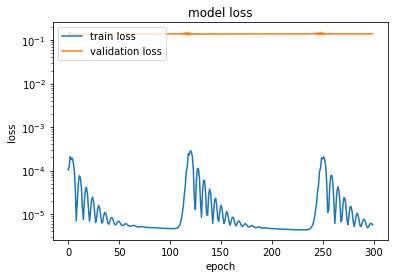

In [120]:
print("==================================================================")
print("===============================Test===============================")
eval_loss = model.evaluate(test_features,test_labels)

# Plot history of train and validation loss
plt.figure()
plt.semilogy(history.history['loss'][-300:])
plt.semilogy(history.history['val_loss'][-300:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.savefig("model_loss_"+str(n_nodes)+"_nodes_"+str(n_layers)+"_layer.png")


In [13]:
model.save('tmp/model')


INFO:tensorflow:Assets written to: tmp/model/assets


In [14]:
predicted = model.predict(test_features)

In [16]:
predicted[:,0].shape, test_labels["cd"].shape

((238,), (238,))

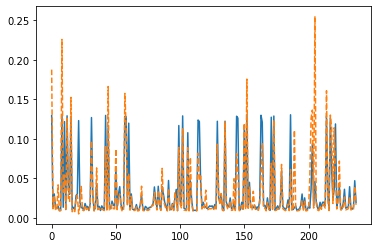

In [112]:
plt.plot(predicted[:,0])
plt.plot(test_labels["cd"].values, "--")
plt.savefig("cd.png")

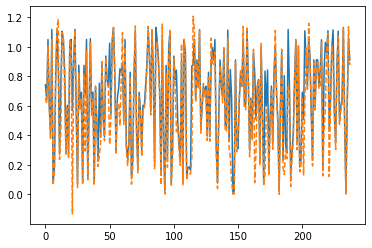

In [111]:
plt.plot(predicted[:,1])
plt.plot(test_labels["cl"].values, "--")
plt.savefig("cl.png")

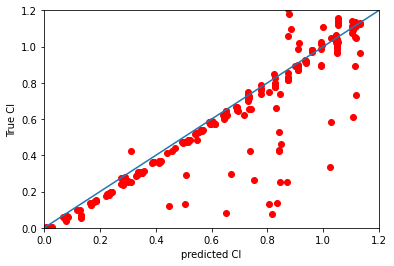

In [105]:
plt.scatter(predicted[:,1], test_labels["cl"].values, c="red" )
plt.xlabel("predicted Cl")
plt.ylabel("True Cl")
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.plot([0, 1, 2])

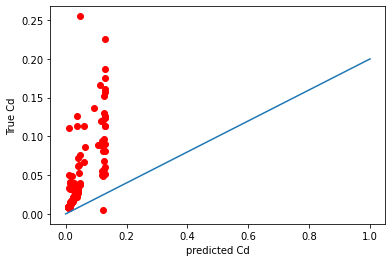

In [110]:
plt.scatter(predicted[:,0], test_labels["cd"].values, c="red" )
plt.xlabel("predicted Cd")
plt.ylabel("True Cd")

plt.plot([0, 0.2])

In [19]:
model.evaluate(test_features, test_labels)

8/8 [==============================] - 0s 1ms/step - loss: 0.0134


0.013355353847146034

In [21]:
model.predict(x=[[51.4815, 0]])

array([[0.01020606, 0.02043524]], dtype=float32)

In [22]:
model.predict(x=[[51.4815, 5]])

array([[0.01254354, 0.5557283 ]], dtype=float32)

In [23]:
model.predict(x=[[51.4815, 10]])

array([[0.02255384, 0.9609469 ]], dtype=float32)

In [24]:
model.predict(x=[[51.4815, 15]])

array([[0.11666913, 0.30919284]], dtype=float32)

In [38]:
nasa=pd.read_csv("nasa.dat", sep="\s+", names=["angle","cl","cd"])

In [39]:
nasa

,angle,cl,cd
0,-4.04,-0.4417,0.00871
1,-2.14,-0.2385,0.00800
2,-0.05,-0.0126,0.00809
3,2.05,0.2125,0.00816
4,4.04,0.4316,0.00823
5,6.09,0.6546,0.00885
6,8.30,0.8873,0.01050
7,10.12,1.0707,0.01201
8,11.13,1.1685,0.01239
9,12.12,1.2605,0.01332


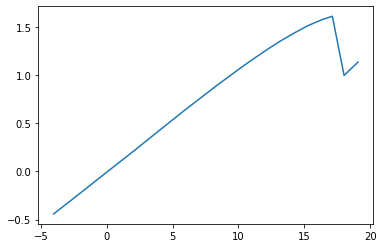

In [42]:
plt.plot(nasa["angle"], nasa["cl"])

In [44]:
nasa["u"] = 51.4815
nasa.head()

,angle,cl,cd,u
0,-4.04,-0.4417,0.00871,51.4815
1,-2.14,-0.2385,0.00800,51.4815
2,-0.05,-0.0126,0.00809,51.4815
3,2.05,0.2125,0.00816,51.4815
4,4.04,0.4316,0.00823,51.4815


In [ ]:
nasa_predict = model.predict(nasa["a"])

In [46]:
test_features = nasa[["u", "angle"]]

In [47]:
test_features

,u,angle
0,51.4815,-4.04
1,51.4815,-2.14
2,51.4815,-0.05
3,51.4815,2.05
4,51.4815,4.04
5,51.4815,6.09
6,51.4815,8.30
7,51.4815,10.12
8,51.4815,11.13
9,51.4815,12.12


In [48]:
nasa_predict = model.predict(test_features)

In [53]:
nasa_predict.shape

(17, 2)

In [54]:
nasa.shape

(17, 4)

(0.0, 14.0)

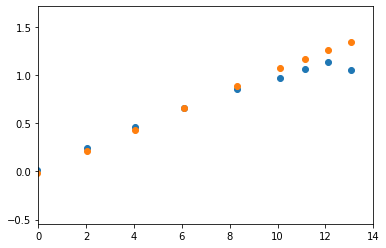

In [64]:
plt.scatter(nasa["angle"], nasa_predict[:,1])
plt.scatter(nasa["angle"], nasa["cl"])

(0.0, 0.08)

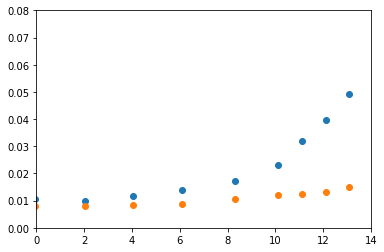

In [70]:
plt.scatter(nasa["angle"], nasa_predict[:,0])
plt.scatter(nasa["angle"], nasa["cd"])
plt.xlim(0,14)
plt.ylim(0,0.08)